In [2]:
import os
import sys
sys.path.append('/home/user/Desktop/Thesis_Scripts/Modules')

from Tkinter import *
import Tkinter, Tkconstants, tkFileDialog
import Import_module as im
import Filtering_module as fm

import Spiker as sp

import numpy as np 

from h5py import File


import math

import time

import matplotlib
matplotlib.use('TkAgg') #Not case-sensitive
#%matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
'''
import holoviews as hv
import datashader as ds
from holoviews.operation.datashader import datashade
import datashader.transfer_functions as tf
hv.extension('bokeh')
'''

/usr/lib64/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


"\nimport holoviews as hv\nimport datashader as ds\nfrom holoviews.operation.datashader import datashade\nimport datashader.transfer_functions as tf\nhv.extension('bokeh')\n"

## Script purpose:
### Counterpart of the stimulation scripts find_stim_el_neighbor.py and find_stim_el_tunnel.py to analyze the generated data

In [38]:
root = Tk()
root.withdraw()
path = tkFileDialog.askdirectory(initialdir = "/home/user/Desktop/Data")
root.destroy()
print path

/home/user/Desktop/Data/2018-6-5/2013/stimulation


In [39]:
begin = time.time()
raw = im.import_rawdata(path,0,'end',modified=True)
end = time.time()
elapsed = end - begin
print 'elapsed time: {0:.1f} seconds'.format(elapsed)

FloatProgress(value=0.0, bar_style=u'success', description=u'Importing...', max=54.0)

elapsed time: 12.3 seconds


In [40]:
filtdat = fm.Filtering(raw)
filtdat.butter_filter(300,3000)
filtdat.discard_out_of_bounds()
filtdat.reshape(1000)
raw=None

FloatProgress(value=0.0, bar_style=u'success', description=u'Filtering...', max=54.0)

12
Recording 0.0: Discarded 0.0 traces.
Recording 0.0: 12.0 Critical traces.
373
Recording 1.0: Discarded 0.0 traces.
Recording 1.0: 373.0 Critical traces.
13
Recording 2.0: Discarded 0.0 traces.
Recording 2.0: 13.0 Critical traces.
359
Recording 3.0: Discarded 0.0 traces.
Recording 3.0: 359.0 Critical traces.
12
Recording 4.0: Discarded 0.0 traces.
Recording 4.0: 12.0 Critical traces.
337
Recording 5.0: Discarded 0.0 traces.
Recording 5.0: 337.0 Critical traces.
12
Recording 6.0: Discarded 0.0 traces.
Recording 6.0: 12.0 Critical traces.
328
Recording 7.0: Discarded 0.0 traces.
Recording 7.0: 328.0 Critical traces.
12
Recording 8.0: Discarded 0.0 traces.
Recording 8.0: 12.0 Critical traces.
288
Recording 9.0: Discarded 0.0 traces.
Recording 9.0: 288.0 Critical traces.
317
Recording 10.0: Discarded 0.0 traces.
Recording 10.0: 317.0 Critical traces.
12
Recording 11.0: Discarded 0.0 traces.
Recording 11.0: 12.0 Critical traces.
284
Recording 12.0: Discarded 0.0 traces.
Recording 12.0: 28

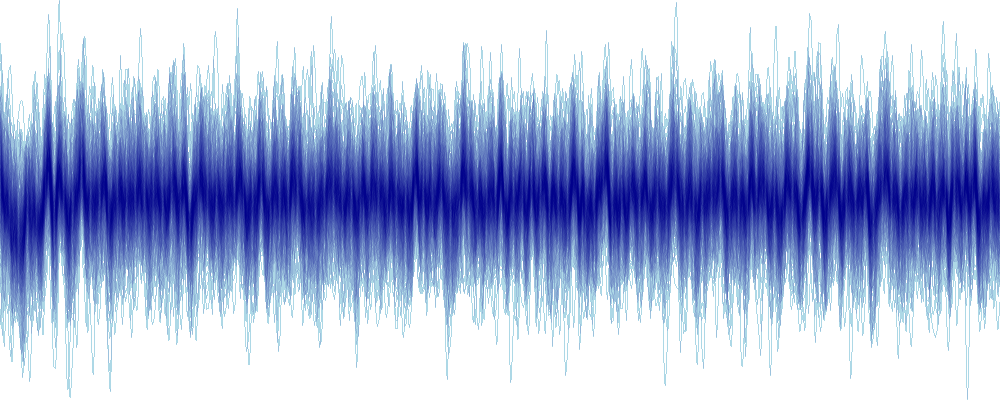

In [5]:
#Show all curves
begin =60
end=-50
j = 0
rec = 30
d0 = ds.utils.dataframe_from_multiple_sequences(filtdat.metadata[rec]['time'][j,begin:end],filtdat.butter_data[rec][j,:,begin:end])
cvs = ds.Canvas(plot_height=400, plot_width=1000)
agg = cvs.line(d0, 'x', 'y', ds.count())   
img0 = tf.shade(agg, how='eq_hist')
img0

In [41]:
#Spike Detection: Multiple recordings: find best stim el script
pos_ind = [[sp.spiker(5,0.01,p,filtdat.metadata[i]['time'][j],80,-80) for j,p in enumerate(k)] for i,k in enumerate(filtdat.butter_data)]
neg_ind = [[sp.spiker(5,0.01,-1*p,filtdat.metadata[i]['time'][j],80,-80) for j,p in enumerate(k)] for i,k in enumerate(filtdat.butter_data)]

In [42]:
pos_spikes = [[[i for i in enumerate(j) if i[1]] for j in k] for k in pos_ind]
pos_spikes = [[i for i in enumerate(k) if i[1]] for k in pos_spikes]

neg_spikes = [[[i for i in enumerate(j) if i[1]] for j in k] for k in neg_ind]
neg_spikes = [[i for i in enumerate(k) if i[1]] for k in neg_spikes]

for j in range(len(neg_spikes)):
    print 'Rec. \tstim.\t-spike'
    for i in neg_spikes[j]:
        print j, '\t', i[0], '\t',len(i[1])
        
for j in range(len(pos_spikes)):
    print 'Rec. \tstim.\t+spike'
    for i in pos_spikes[j]:
        print j, '\t', i[0], '\t',len([1])

Rec. 	stim.	-spike
0 	0 	1
0 	8 	1
Rec. 	stim.	-spike
1 	0 	1
Rec. 	stim.	-spike
Rec. 	stim.	-spike
Rec. 	stim.	-spike
Rec. 	stim.	-spike
5 	0 	2
Rec. 	stim.	-spike
Rec. 	stim.	-spike
Rec. 	stim.	-spike
Rec. 	stim.	-spike
Rec. 	stim.	-spike
10 	2 	1
Rec. 	stim.	-spike
Rec. 	stim.	-spike
Rec. 	stim.	-spike
13 	0 	2
Rec. 	stim.	-spike
Rec. 	stim.	-spike
15 	0 	1
Rec. 	stim.	-spike
16 	0 	3
Rec. 	stim.	-spike
17 	0 	1
17 	7 	1
Rec. 	stim.	-spike
18 	0 	5
Rec. 	stim.	-spike
19 	4 	1
Rec. 	stim.	-spike
Rec. 	stim.	-spike
21 	5 	1
Rec. 	stim.	-spike
Rec. 	stim.	-spike
23 	0 	2
23 	2 	1
Rec. 	stim.	-spike
24 	0 	1
Rec. 	stim.	-spike
25 	3 	1
Rec. 	stim.	-spike
26 	8 	1
Rec. 	stim.	-spike
Rec. 	stim.	-spike
Rec. 	stim.	-spike
29 	0 	3
Rec. 	stim.	-spike
Rec. 	stim.	-spike
31 	0 	2
31 	5 	1
Rec. 	stim.	-spike
32 	0 	2
Rec. 	stim.	-spike
33 	0 	1
Rec. 	stim.	-spike
34 	0 	1
34 	7 	1
Rec. 	stim.	-spike
35 	8 	1
Rec. 	stim.	-spike
Rec. 	stim.	-spike
Rec. 	stim.	-spike
Rec. 	stim.	-spike
Rec. 	stim

In [123]:
pos_spikes[13][6][1]

[(6, [224]),
 (12, [224]),
 (27, [222]),
 (30, [223]),
 (34, [223]),
 (35, [222]),
 (36, [223]),
 (37, [223]),
 (46, [225]),
 (51, [224]),
 (53, [225]),
 (56, [224]),
 (60, [223]),
 (62, [225]),
 (65, [224]),
 (71, [222]),
 (78, [224]),
 (80, [224]),
 (83, [222]),
 (88, [223]),
 (89, [224]),
 (94, [223]),
 (103, [224]),
 (104, [222]),
 (113, [222]),
 (117, [223]),
 (118, [223]),
 (119, [223]),
 (122, [223]),
 (123, [222]),
 (130, [223]),
 (138, [225]),
 (143, [222]),
 (144, [223]),
 (147, [222]),
 (148, [223]),
 (150, [225]),
 (151, [223]),
 (153, [223]),
 (156, [224]),
 (157, [223]),
 (159, [224]),
 (160, [222]),
 (163, [222]),
 (170, [224]),
 (176, [223]),
 (178, [225]),
 (184, [223]),
 (185, [223]),
 (191, [224]),
 (193, [222]),
 (195, [223]),
 (196, [223]),
 (199, [222]),
 (202, [223]),
 (204, [223]),
 (207, [223]),
 (209, [222]),
 (210, [224]),
 (214, [224]),
 (216, [222]),
 (219, [224]),
 (224, [223]),
 (228, [224]),
 (231, [225]),
 (232, [222]),
 (234, [224]),
 (235, [223]),
 (2

(-50, 50)

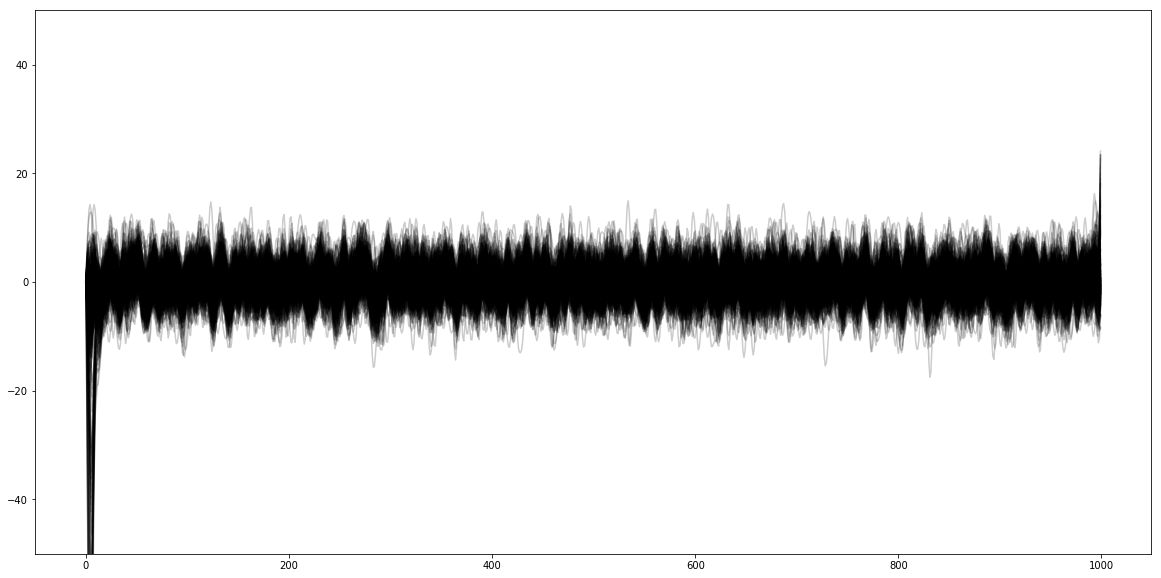

In [8]:
fig,ax=plt.subplots(figsize=(20,10))
for i in filtdat.butter_data[12][0]:
    plt.plot(i,alpha=0.2,color='k')
    
ax.set_ylim([-50,50])

In [45]:
#Let the user select a dataset and open the h5 file

root = Tk()
root.withdraw()#Remove the root window from the screen without removing it
path = tkFileDialog.askopenfilename(initialdir = "/home/user/Desktop/Data")
root.destroy()
print path

### Count spikes on neighboring electrodes

In [10]:
logfile=File(path,'r+')

In [11]:
el_array = np.zeros((120,220))
for i in logfile['stim_config_13']['recording_electrodes'].attrs.itervalues():
    x = i%220
    y = i/220
    el_array[y,x]=1

spike_inds = [filtdat.metadata[13]['clean_abs_inds'][i[0]] for i in pos_spikes[13][4][1]]

for i in spike_inds:
    x = i%220
    y = i/220
    el_array[y,x]=0.5
    
    
plt.figure(figsize=(15,10))
plt.imshow(el_array,cmap='hot')

IndexError: list index out of range

In [13]:
pos_spikes[13][2]

(4,
 [(0, [158]),
  (2, [157]),
  (3, [115, 787]),
  (6, [115, 787]),
  (9, [157]),
  (11, [115]),
  (12, [158]),
  (13, [115]),
  (23, [787]),
  (24, [116, 788]),
  (27, [114, 786]),
  (30, [115, 787]),
  (32, [114]),
  (34, [115, 787]),
  (35, [157, 786]),
  (36, [115, 787]),
  (37, [115, 787]),
  (38, [158, 787]),
  (45, [114]),
  (49, [115]),
  (51, [157]),
  (53, [158]),
  (56, [114]),
  (57, [114]),
  (58, [115]),
  (59, [115]),
  (60, [115, 788]),
  (62, [115, 788]),
  (63, [115]),
  (65, [158, 787]),
  (66, [158]),
  (67, [157]),
  (68, [157]),
  (69, [158]),
  (71, [157, 787]),
  (75, [115, 788]),
  (76, [158]),
  (77, [115]),
  (78, [115]),
  (80, [115, 787]),
  (81, [115, 787]),
  (82, [115]),
  (83, [115, 787]),
  (85, [788]),
  (86, [115, 787]),
  (87, [114]),
  (88, [115, 787]),
  (89, [115, 788]),
  (93, [115, 787]),
  (94, [115, 788]),
  (96, [158]),
  (97, [115, 788]),
  (98, [115, 787]),
  (100, [157]),
  (101, [158]),
  (103, [158, 788]),
  (104, [115, 787]),
  (106,

In [36]:
plt.figure(figsize=(20,15))
for i in pos_spikes[13][2][1]:
    plt.plot(filtdat.butter_data[13][pos_spikes[13][2][0]][i[0]][i[1][0]-30:i[1][0]+50],alpha=0.3)

IndexError: list index out of range

In [35]:
plt.figure(figsize=(20,15))
for i in pos_spikes[13][2][1]:
    plt.plot(filtdat.butter_data[13][pos_spikes[13][2][0]][i[0]][100:200],alpha=0.3)

IndexError: list index out of range

In [37]:
for i,k in enumerate(neg_spikes):
    config = logfile['stim_config_'+str(i)]
    store_neg_spikes = config.create_group('spikes/neg')
    for j in k:
        neg_abs_inds = [p[0] for p in j[1]]
        for p in neg_abs_inds:
            neg_abs_ind = filtdat.metadata[i]['clean_abs_inds'][p]
            neg_timings = j[1]
            for key,value in logfile['stim_config_'+str(i)+'/neighbors'].attrs.iteritems():
                if neg_abs_ind in value:
                    stim_el = logfile['stim_config_'+str(i)+'/stimlist'].attrs[key]
                    try:
                        channel = store_neg_spikes.create_group(key)
                        channel.attrs.create('stimulation_electrode',stim_el)
                        spike_count = len(neg_timings)
                        channel.attrs.create('spike_count',spike_count)
                    except:
                        spike_count = store_neg_spikes[key].attrs.get('spike_count') + len(neg_timings)
                        store_neg_spikes[key].attrs.modify('spike_count',spike_count)

ValueError: Unable to create group (name already exists)

In [ ]:
for i,k in enumerate(pos_spikes):
    config = logfile['stim_config_'+str(i)]
    store_pos_spikes = config.create_group('spikes/pos')
    for j in k:
        pos_abs_inds = [p[0] for p in j[1]]
        for p in pos_abs_inds:
            pos_abs_ind = filtdat.metadata[i]['clean_abs_inds'][p]
            pos_timings = j[1]
            for key,value in logfile['stim_config_'+str(i)+'/neighbors'].attrs.iteritems():
                if pos_abs_ind in value[:]:
                    stim_el = logfile['stim_config_'+str(i)+'/stimlist'].attrs[key]
                    try:
                        channel = store_pos_spikes.create_group(key)
                        channel.attrs.create('stimulation_electrode',stim_el)
                        spike_count = len(pos_timings)
                        channel.attrs.create('spike_count',spike_count)
                    except:
                        spike_count = store_pos_spikes[key].attrs.get('spike_count') + len(pos_timings)
                        store_pos_spikes[key].attrs.modify('spike_count',spike_count)

In [44]:
#Plot each stimulation electrode
min_x=[]
min_y=[]
max_x=[]
max_y=[]
for i in filtdat.metadata:
    min_x.append(np.min(i['x_clean']))
    min_y.append(np.min(i['y_clean']))
    max_x.append(np.max(i['x_clean']))
    max_y.append(np.max(i['y_clean']))
span_x=np.max(max_x)-np.min(min_x)
span_y=np.max(max_y)-np.min(min_y)

Activity_map = np.zeros([span_y+1,span_x+1])
print Activity_map.shape

for key,value in logfile.iteritems():
    for key2,value2 in value['spikes/poa'].iteritems():      
        electrodes = value2.attrs['stimulation_electrode']
        print electrodes
        y=electrodes/220
        x=electrodes%220
        Activity_map[y-np.min(min_y),x-np.min(min_x)]=value2.attrs['spike_count']
    
fig=plt.figure(figsize=(25,15))
plt.imshow(Activity_map,cmap='hot',interpolation='nearest')
plt.colorbar()

(23, 138)


KeyError: "Unable to open object (object 'poa' doesn't exist)"

### Count spikes in tunnel

In [46]:
#Let the user select a dataset and open the h5 file

root = Tk()
root.withdraw()#Remove the root window from the screen without removing it
path = tkFileDialog.askopenfilename(initialdir = "/home/user/Desktop/Data")
root.destroy()
print path

/home/user/Desktop/Data/2018-6-5/2013/stimulation/stimlist_stim_config_.hdf5


In [47]:
logfile=File(path,'r+')

In [48]:
for key,value in logfile.iteritems():
    del value['spikes']

In [49]:
for i,k in enumerate(neg_spikes):
    config = logfile['stim_config_'+str(i)]
    store_neg_spikes = config.create_group('spikes/neg') # Store counted spikes in attribute
    for j in k:
        neg_rel_inds = [p for p in j[1]]
        for p in neg_rel_inds:
            neg_abs_ind = filtdat.metadata[i]['clean_abs_inds'][p[0]]
            neg_count = len(p[1])
            for key,value in logfile['stim_config_'+str(i)+'/recording_electrodes'].attrs.iteritems():
                ## 'key in logfile' ensures that the crossing mesaured resulted from a stimulus.
                if (neg_abs_ind in value) and (key in logfile['stim_config_'+str(i)+'/stimlist'].attrs.keys()):
                    stim_el = logfile['stim_config_'+str(i)+'/stimlist'].attrs[key]
                    try:
                        channel = store_neg_spikes.create_group(key)
                        channel.attrs.create('stimulation_electrode',stim_el)
                        channel.attrs.create('spike_count',neg_count)
                        channel.attrs.create('spikes',p)
                    except:
                        spike_count = store_neg_spikes[key].attrs.get('spike_count') + neg_count
                        store_neg_spikes[key].attrs.modify('spike_count',spike_count)

In [50]:
for i,k in enumerate(pos_spikes):
    config = logfile['stim_config_'+str(i)]
    store_pos_spikes = config.create_group('spikes/pos') # Store counted spikes in attribute
    for j in k: 
        pos_rel_inds = [p[0] for p in j[1]]
        for p in pos_rel_inds:
            pos_abs_ind = filtdat.metadata[i]['clean_abs_inds'][p]
            pos_count = len(j[1])
            for key,value in logfile['stim_config_'+str(i)+'/recording_electrodes'].attrs.iteritems():
                ## 'key in logfile' ensures that the crossing mesaured resulted from a stimulus.
                if (pos_abs_ind in value) and (key in logfile['stim_config_'+str(i)+'/stimlist'].attrs.keys()):
                    stim_el = logfile['stim_config_'+str(i)+'/stimlist'].attrs[key]
                    try:
                        channel = store_pos_spikes.create_group(key)
                        channel.attrs.create('stimulation_electrode',stim_el)
                        channel.attrs.create('spike_count',pos_count)
                    except:
                        spike_count = store_pos_spikes[key].attrs.get('spike_count') + pos_count
                        store_pos_spikes[key].attrs.modify('spike_count',spike_count)

In [ ]:
#################################################

### Import 26x6x6 data

In [51]:
root = Tk()
root.withdraw()
path_2 = tkFileDialog.askdirectory(initialdir = "/home/user/Desktop/Data")
root.destroy()
print path_2

/home/user/Desktop/Data/2018-5-23/2013/voltage_map


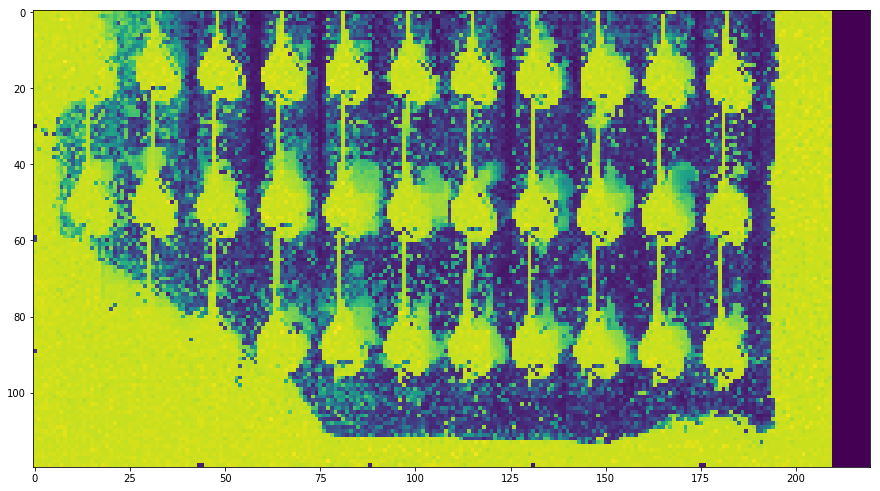

In [52]:
try:
    h5paths = sorted([os.path.join(path_2,f) for f in os.listdir(path_2) if f.endswith('.raw.h5')])
    f = [File(i, "r") for i in h5paths]
except:
    sys.exit('H5 dataset could not be imported.')

#Figure out all electrode numbers
electrode_info = [np.asarray(i['mapping']['channel','electrode']) for i in f]
mask = [i['electrode']!=-1 for i in electrode_info]
clean_abs_inds = [i[0]['electrode'][i[1]] for i in zip(electrode_info,mask)]
clean_rel_inds = [i[0]['channel'][i[1]] for i in zip(electrode_info,mask)]

#For each recording figure out the x and y coordinates per electrode
x_clean=[v%220 for v in clean_abs_inds]
y_clean=[v/220 for v in clean_abs_inds]

cut_traces = []
for i,v in enumerate(clean_rel_inds):
    cut_traces.append(np.asarray(f[i]['sig'])[v,900:1000])

cut_traces_max=np.asarray([np.amax(i,axis=1) for i in cut_traces])
cut_traces_min=np.asarray([np.amin(i,axis=1) for i in cut_traces])
cut_traces_amp=cut_traces_max-cut_traces_min

#For each recordig build the elctrode array for visualization
el_array = np.zeros((120,220))
for i,j in enumerate(cut_traces_amp):
    el_array[y_clean[i],x_clean[i]]=j
    
fig=plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.imshow(el_array)

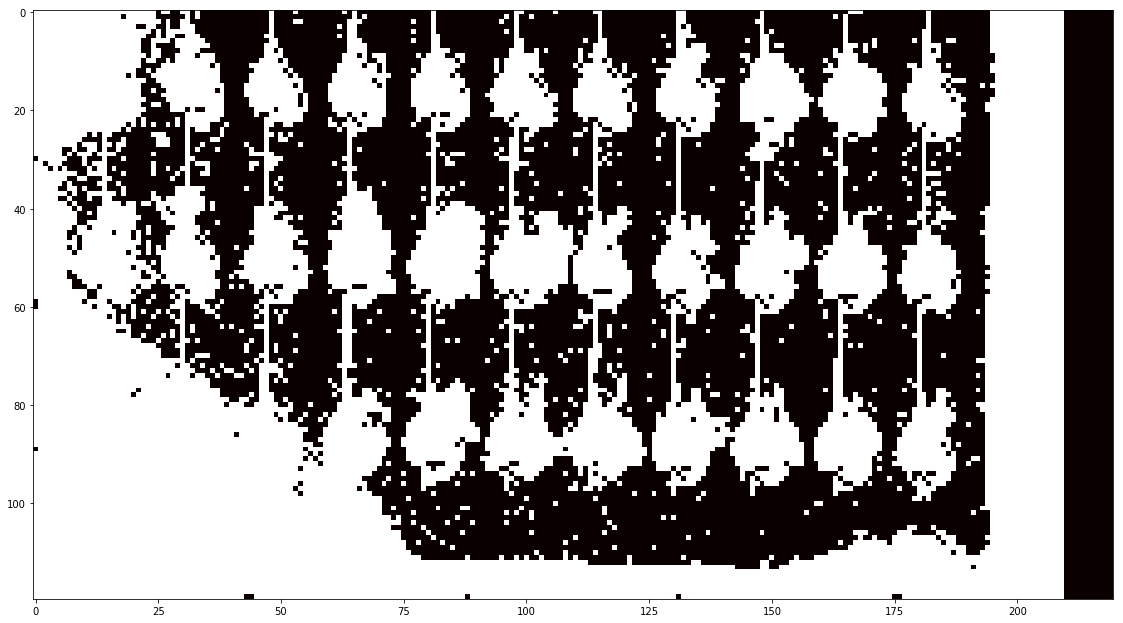

In [53]:
#Threshold the image
threshold = 120
mask = el_array>threshold
el_array[mask]=1
el_array[np.invert(mask)]=0

fig=plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
ax.imshow(el_array,'hot')

In [123]:
#Plot each stimulation electrode and the corresponding negativespikes as heatmap
background=el_array
activity_map=np.zeros_like(el_array)
for key,value in logfile.iteritems():
    for key2,value2 in value['spikes/neg'].iteritems():     
        #print value2.attrs['spike_count']
        electrodes = value2.attrs['stimulation_electrode']
        y=electrodes/220
        x=electrodes%220
        activity_map[y,x]=value2.attrs['spike_count']
    
fig=plt.figure(figsize=(18,6))
ax=fig.add_axes([0,0,0.95,1])
ax.set_aspect('equal')
ax.set_facecolor('k')
ax.set_ylabel(r'$electrode$',fontsize=20)
ax.set_xlabel(r'$electrode$',fontsize=20)
ax.tick_params(axis='both',labelsize=15)
i = ax.imshow(activity_map[40:-10,40:-30],aspect='auto',cmap='afmhot',interpolation='none')
i_back = ax.imshow(background[40:-10,40:-30],aspect='auto',cmap='gray',interpolation='none',alpha=0.1)
colorbar_ax = fig.add_axes([0.95,0,0.01,1])#Place colorbar next to el_array
#ax.set_axis_off() #Disable the axis labels
cbar = fig.colorbar(i,cax=colorbar_ax,ax=i_back,ticks=[0,1,2,3,4])
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_ylabel(r'$\# spikes$',fontsize=25)
#cbar.ax.set_yticks(np.linspace(0,1,5))
cbar.ax.set_yticklabels([0,1,2,3,4])
plt.savefig(path[:-27]+'/stimulation_efficiency_neg.png',bbox_inches='tight',pad_inches=0)
plt.close()

In [303]:
#Plot each stimulation electrode and the corresponding negativespikes as heatmap
background=el_array
activity_map=np.zeros_like(el_array)
for key,value in logfile.iteritems():
    for key2,value2 in value['spikes/neg'].iteritems():     
        #print value2.attrs['spike_count']
        electrodes = value2.attrs['stimulation_electrode']
        y=electrodes/220
        x=electrodes%220
        activity_map[y,x]=value2.attrs['spike_count']
    
fig=plt.figure(figsize=(18,6))
ax=fig.add_axes([0,0,0.95,1])
ax.set_aspect('equal')
ax.set_facecolor('k')
ax.set_ylabel(r'$electrode$',fontsize=20)
ax.set_xlabel(r'$electrode$',fontsize=20)
ax.tick_params(axis='both',labelsize=15)
i = ax.imshow(npblend,aspect='auto',cmap='afmhot',interpolation='none',vmax=70)
colorbar_ax = fig.add_axes([0.95,0,0.01,1])#Place colorbar next to el_array
cbar = fig.colorbar(i,cax=colorbar_ax,ticks=[0,17,34,51,70])
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_ylabel(r'$\# spikes$',fontsize=25)
#cbar.ax.set_yticks(np.linspace(0,1,5))
cbar.ax.set_yticklabels([0,1,2,3,4])
plt.savefig(path[:-27]+'/stimulation_efficiency_neg.png',bbox_inches='tight',pad_inches=0)
plt.close()

In [301]:
70/4

17

In [171]:
from PIL import Image
from PIL.ImageOps import invert

In [281]:
normalized = (activity_map-np.min(activity_map))/(np.max(activity_map)-np.min(activity_map))

In [286]:
annot_raw = plt.imread('/home/user/Desktop/Data/2018-5-23/2013/voltage_map/circle_segmentation_bottom/structure_10.png')[200:-100,300:-100]
annot = Image.fromarray(np.uint8(annot_raw*(250./2))).resize((490,260),Image.NEAREST)
fore = Image.fromarray(np.uint8(normalized*(255))).resize((2200,1200),Image.NEAREST).crop((300,300,1900,1000))
back = invert(Image.fromarray(np.uint8(background*(255.)))).resize((2200,1200),Image.NEAREST).crop((300,300,1900,1000))

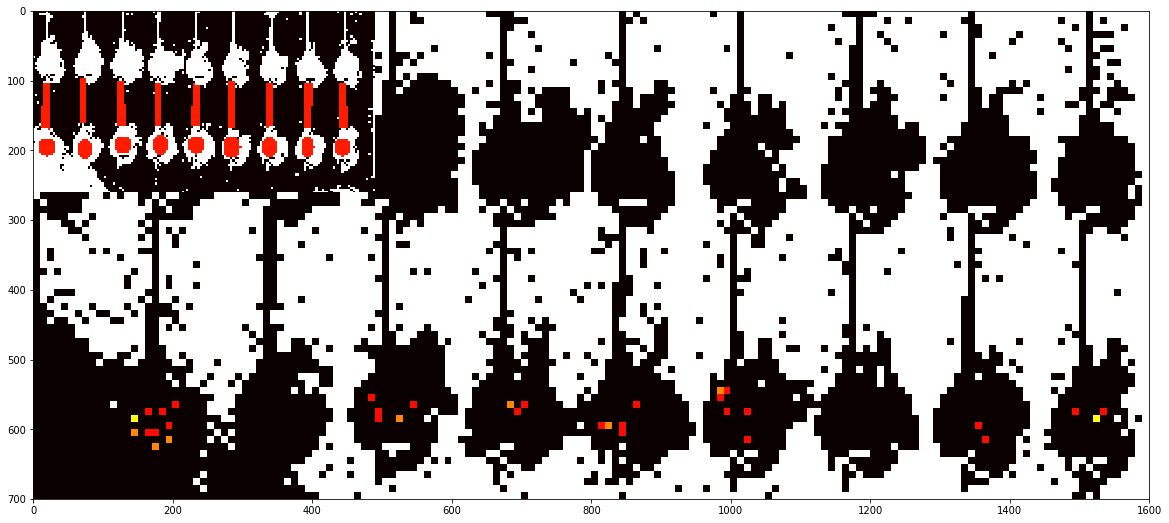

In [294]:
blend = Image.blend(fore,back,0.7)
blend.paste(annot,(0,0))

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)

plt.imshow(blend,'hot',vmax=100)

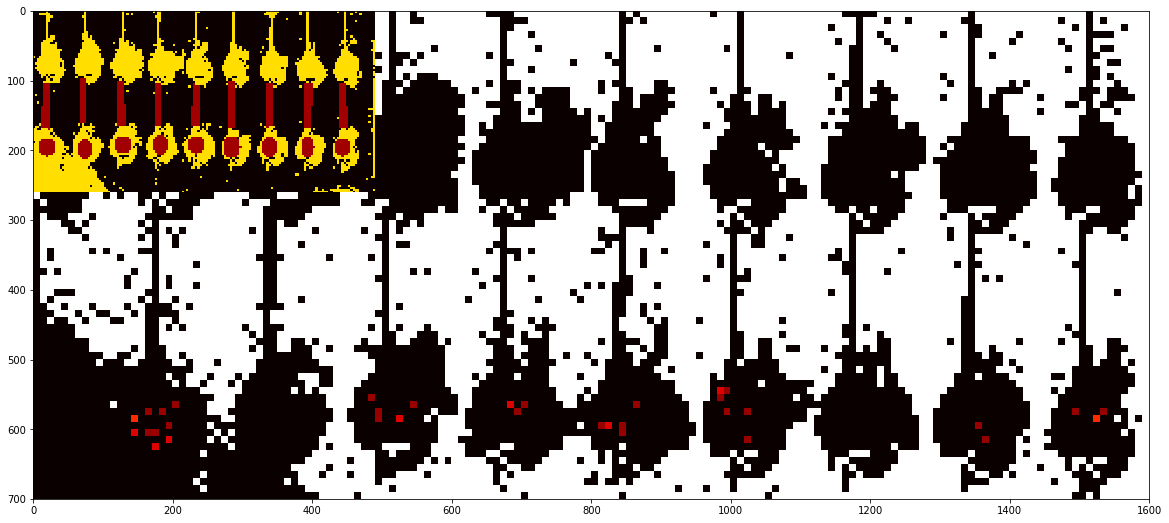

In [295]:
npblend = np.array(blend)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)

plt.imshow(npblend,'hot')

In [55]:
#Plot each stimulation electrode and the corresponding positive spikes as heatmap
background=el_array
activity_map=np.zeros_like(el_array)
for key,value in logfile.iteritems():
    for key2,value2 in value['spikes/pos'].iteritems():     
        #print value2.attrs['spike_count']
        electrodes = value2.attrs['stimulation_electrode']
        y=electrodes/220
        x=electrodes%220
        activity_map[y,x]=value2.attrs['spike_count']
    
fig=plt.figure(figsize=(18,6))
ax=fig.add_axes([0,0,0.95,1])
ax.set_aspect('equal')
ax.set_facecolor('k')
ax.set_ylabel(r'$electrode$',fontsize=20)
ax.set_xlabel(r'$electrode$',fontsize=20)
ax.tick_params(axis='both',labelsize=15)
i = ax.imshow(activity_map[50:,20:-50],aspect='auto',cmap='afmhot',interpolation='none')
i_back = ax.imshow(background[50:,20:-50],aspect='auto',cmap='gray',interpolation='none',alpha=0.1)
colorbar_ax = fig.add_axes([0.95,0,0.01,1])#Place colorbar next to el_array
#ax.set_axis_off() #Disable the axis labels
cbar = fig.colorbar(i,cax=colorbar_ax,ax=i_back)
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_ylabel(r'$\# spikes$',fontsize=25)
plt.savefig(path[:-27]+'/stimulation_efficiency_pos.png',bbox_inches='tight',pad_inches=0)
plt.close()

In [25]:
for key,value in logfile.iteritems():
    print key
    try:
        print value['spikes/neg/channel_0'].attrs['spike_count']
    except:
        pass

stim_config_0
stim_config_1
143
stim_config_10
stim_config_11
59
stim_config_12
stim_config_13
28
stim_config_14
103
stim_config_15
71
stim_config_16
7
stim_config_17
stim_config_18
21
stim_config_19
17
stim_config_2
stim_config_20
12
stim_config_21
4
stim_config_22
21
stim_config_23
stim_config_24
4
stim_config_25
2
stim_config_26
15
stim_config_27
13
stim_config_28
16
stim_config_29
9
stim_config_3
166
stim_config_30
8
stim_config_31
4
stim_config_32
13
stim_config_33
stim_config_34
stim_config_35
4
stim_config_36
2
stim_config_37
7
stim_config_38
2
stim_config_39
stim_config_4
stim_config_40
2
stim_config_41
stim_config_42
stim_config_43
stim_config_44
stim_config_45
stim_config_46
10
stim_config_47
15
stim_config_48
2
stim_config_49
stim_config_5
136
stim_config_50
stim_config_51
stim_config_52
stim_config_53
stim_config_54
stim_config_6
2
stim_config_7
41
stim_config_8
stim_config_9


/home/user/anaconda2/envs/ds/lib/python2.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  


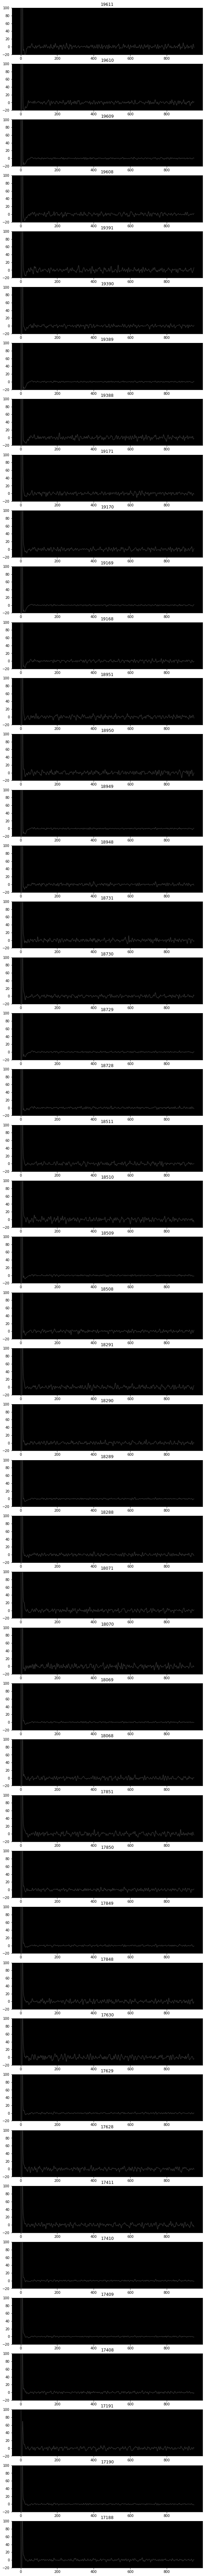

In [33]:
#Plot spikes in channel 1
config_no = 1
stim=4
num_hor_plot=1
num_ver_plots=len(indices)
plot_length=10

fig,axarr=plt.subplots(num_ver_plots,num_hor_plot,figsize=(plot_length*num_hor_plot,3*num_ver_plots))

for ids,s in enumerate(indices):
    rel_ind = np.where(filtdat.metadata[config_no]['clean_abs_inds']==s)[0][0]
    axarr[ids].plot(filtdat.butter_data[config_no][stim,rel_ind,:-50],alpha=0.2,color='w')
    axarr[ids].set_title(str(s))
    axarr[ids].set_axis_bgcolor('k')
    axarr[ids].set_ylim([-20,100])
    
plt.subplots_adjust(wspace=.25)

In [130]:
neg_spikes[12]

[(1, [(113, [260])]),
 (2, [(49, [756]), (342, [321])]),
 (3, [(179, [279])]),
 (5, [(2, [269]), (38, [740]), (448, [423])]),
 (9, [(547, [176])])]